![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [ ]:
# SUGERIDO: Descomenta la siguiente linea de código si requieres instalar las libreías básicas utilizadas en este notebook
# Si requieres incluir más librerías puedes agregarlas al archivo Semana 4\requirements.txt
# !pip install -r requirements.txt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [5]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [6]:
df.shape

(541462, 3)

<Axes: >

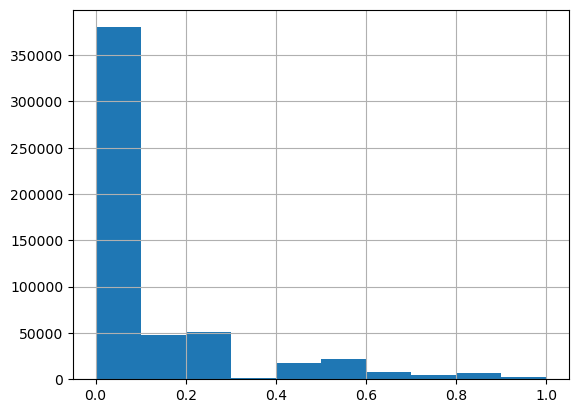

In [6]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [8]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [11]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [13]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 1
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Tokenización de comentarios (unigramas)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)  # Solo .fit en train
X_test_vec = vectorizer.transform(X_test)        # Solo .transform en test

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_vec, y_train)

#  Predicciones
y_pred = model.predict(X_test_vec)

# Evaluación del desempeño con MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE usando CountVectorizer + LinearRegression: {mse:.4f}")


MSE usando CountVectorizer + LinearRegression: 0.0372


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [17]:
# Celda 2

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Tokenización con trigramas 
vectorizer = CountVectorizer(ngram_range=(3, 3))  
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#  Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_vec, y_train)

# Predicciones
y_pred = model.predict(X_test_vec)

# Evaluación del desempeño con MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE usando CountVectorizer (trigramas) + LinearRegression: {mse:.4f}")


MSE usando CountVectorizer (trigramas) + LinearRegression: 0.0398


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

###Celda 3  
El TfidfVectorizer es una técnica de tokenización que convierte documentos de texto en vectores numéricos utilizando la medida TF-IDF (Frecuencia de Término - Frecuencia Inversa de Documento). El TF mide cuántas veces aparece una palabra en un documento, mientras que el IDF refleja la importancia de una palabra, disminuyendo su peso si aparece en muchos documentos. De esta manera, las palabras comunes como "el", "de" o "y" tienen menos peso, mientras que las palabras que son frecuentes en un documento pero no en muchos otros, ganan relevancia.

En comparación con el CountVectorizer, el TfidfVectorizer tiene ventajas como reducir el peso de palabras comunes que aportan poco significado, lo que mejora el rendimiento en muchos modelos y facilita la diferenciación entre documentos. Sin embargo, también tiene desventajas, como ser más costoso computacionalmente y no necesariamente mejorar el rendimiento en conjuntos de datos pequeños o poco variados. Es particularmente útil en tareas como la clasificación de texto o la detección de comentarios tóxicos, ya que ayuda a identificar las palabras con mayor relevancia informativa.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [23]:
# Celda 4
# TF-IDF Vectorization + LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#  Vectorización con TF-IDF (usamos unigramas por defecto)
vectorizer = TfidfVectorizer(max_features=8000)  # Limita el vocabulario para mayor eficiencia
print("Vectorizando comentarios con TF-IDF...")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print("Vectorización completa.")

#  Entrenamiento del modelo de regresión lineal
print("Entrenando modelo LinearRegression con TF-IDF...")
model = LinearRegression()
model.fit(X_train_vec, y_train)
print("Entrenamiento completo.")

#  Predicciones
print("Realizando predicciones...")
y_pred = model.predict(X_test_vec)

# Evaluación con MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE usando TfidfVectorizer + LinearRegression: {mse:.4f}")



Vectorizando comentarios con TF-IDF...
Vectorización completa.
Entrenando modelo LinearRegression con TF-IDF...
Entrenamiento completo.
Realizando predicciones...
MSE usando TfidfVectorizer + LinearRegression: 0.0194


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

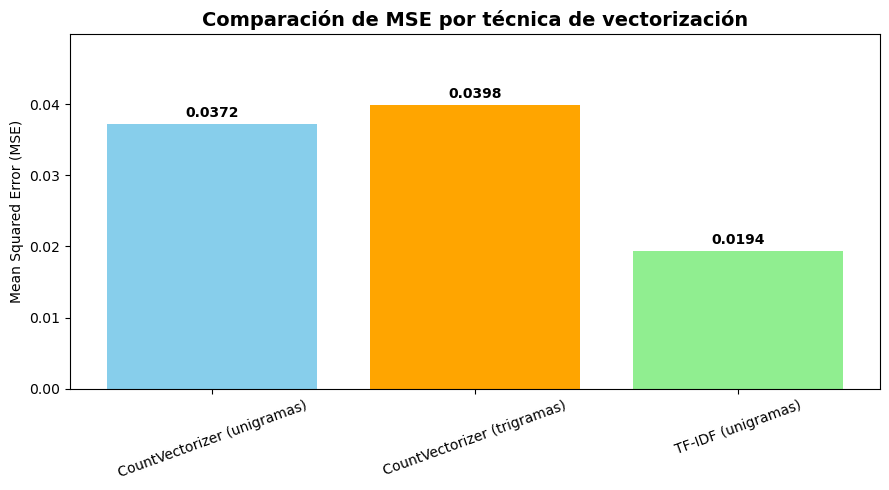

In [45]:
# Celda 5 Código para graficos y tablas comparativas
# Punto 5.1 - Comparación y análisis de resultados

import matplotlib.pyplot as plt

# Resultados MSE obtenidos en puntos anteriores
mse_unigramas = 0.0372       # CountVectorizer (unigramas)
mse_trigramas = 0.0398       # CountVectorizer (trigramas o bigramas+trigramas)
mse_tfidf = 0.0194           # TfidfVectorizer (unigramas)

# Visualización de los resultados
metodos = ["CountVectorizer (unigramas)", "CountVectorizer (trigramas)", "TF-IDF (unigramas)"]
mse_scores = [mse_unigramas, mse_trigramas, mse_tfidf]

plt.figure(figsize=(9, 5))
plt.bar(metodos, mse_scores, color=["skyblue", "orange", "lightgreen"])
plt.title("Comparación de MSE por técnica de vectorización", fontsize=14, fontweight="bold")
plt.ylabel("Mean Squared Error (MSE)")
plt.ylim(0, max(mse_scores) + 0.01)

# Etiquetas sobre cada barra
for i, v in enumerate(mse_scores):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center', fontweight='bold')

plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


### Punto 5.1 - Comparación y análisis de resultados
# Análisis textual de resultados
Se observa que el tipo de vectorización utilizada tiene un impacto importante en el desempeño del modelo de regresión. El CountVectorizer con unigramas proporciona un enfoque básico que captura la frecuencia de cada palabra individual. Este método ofreció un rendimiento razonable (MSE: 0.0372), aunque limitado en cuanto a contexto. Por otro lado, el CountVectorizer con trigramas incrementó la dimensionalidad al incluir secuencias de tres palabras. Aunque aporta más contexto, también genera ruido y posibles problemas de sobreajuste, lo que resultó en un MSE un poco más alto (0.0398).

Finalmente, el TfidfVectorizer con unigramas demostró ser la técnica más efectiva. Este método no solo considera la frecuencia de cada término, sino también su importancia relativa en el conjunto de datos. Esto permitió obtener un MSE mucho menor (0.0194), lo que indica que el modelo generaliza mejor. En conclusión, el preprocesamiento basado en TF-IDF permitió construir una representación más informativa y eficiente del texto, mejorando significativamente la precisión del modelo de regresión.








